In [1]:
# Data analysis & wrangling
import numpy as np 
import pandas as pd 
import random as rnd
import string
import re
import pickle

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Sklearn modules
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.impute import SimpleImputer

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset filtering

In [3]:
df = pd.read_csv('/content/drive/MyDrive/amazon_data_medium.csv',index_col=0)
df

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image,title,category,brand,price
0,5,3,True,"10 6, 2013",A2LSCFZM2FBZK7,0486427706,{'Format:': ' Paperback'},Ginger,The stained glass pages are pretty cool. And i...,Nice book,1381017600,NaN,DOVER PUBLICATIONS Stained Glass Color Book Wi...,"['Toys & Games', 'Arts & Crafts', 'Drawing & P...",Dover Publications,$5.68
1,5,9,True,"08 9, 2013",A3IXP5VS847GE5,0486427706,{'Format:': ' Paperback'},Dragonflies &amp; Autumn Leaves,My 11 y.o. loved this...and so do I (you know ...,Great pictures,1376006400,NaN,DOVER PUBLICATIONS Stained Glass Color Book Wi...,"['Toys & Games', 'Arts & Crafts', 'Drawing & P...",Dover Publications,$5.68
2,5,NaN,True,"04 5, 2016",A1274GG1EB2JLJ,0486427706,{'Format:': ' Paperback'},barbara ann,"The pictures are great , I've done one and gav...","The pictures are great, I've done one and gave...",1459814400,NaN,DOVER PUBLICATIONS Stained Glass Color Book Wi...,"['Toys & Games', 'Arts & Crafts', 'Drawing & P...",Dover Publications,$5.68
3,5,3,True,"02 13, 2016",A30X5EGBYAZQQK,0486427706,{'Format:': ' Paperback'},Samantha,I absolutely love this book! Its translucent p...,So beautiful!,1455321600,NaN,DOVER PUBLICATIONS Stained Glass Color Book Wi...,"['Toys & Games', 'Arts & Crafts', 'Drawing & P...",Dover Publications,$5.68
4,5,NaN,True,"12 10, 2015",A3U6UNXLAUY6ZV,0486427706,{'Format:': ' Paperback'},CP in Texas,I love it!,Five Stars,1449705600,NaN,DOVER PUBLICATIONS Stained Glass Color Book Wi...,"['Toys & Games', 'Arts & Crafts', 'Drawing & P...",Dover Publications,$5.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884948,5,NaN,True,"02 25, 2018",A355AGXGH3P22A,B01HILIX6Q,NaN,Linda,my granddaughter enjoyed her docMcstuffins par...,Five Stars,1519516800,NaN,Doc McStuffins Party Favors Stickers Pack,"['Toys & Games', 'Party Supplies', 'Party Packs']",Disney Studios,NaN
1884949,1,NaN,True,"02 14, 2018",A1RZNLQZDIZ6U8,B01HILIX6Q,NaN,Tara.,The stickers were stuck to the paper. Mostly a...,Mostly ripped pictures because they weren't re...,1518566400,NaN,Doc McStuffins Party Favors Stickers Pack,"['Toys & Games', 'Party Supplies', 'Party Packs']",Disney Studios,NaN
1884950,5,NaN,True,"01 26, 2018",A1CFZTW88EV2T6,B01HILIX6Q,NaN,nakeisha barber,loveit got this for my grand daughters Doc Mcs...,Five Stars,1516924800,NaN,Doc McStuffins Party Favors Stickers Pack,"['Toys & Games', 'Party Supplies', 'Party Packs']",Disney Studios,NaN
1884951,3,NaN,True,"12 17, 2017",A21TLF141LHKBN,B01HILIX6Q,NaN,Amazon Customer,good item,Three Stars,1513468800,NaN,Doc McStuffins Party Favors Stickers Pack,"['Toys & Games', 'Party Supplies', 'Party Packs']",Disney Studios,NaN


In [4]:
vote5=df[(df.vote == 5)]
vote5

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image,title,category,brand,price
32833,5,5.0,True,"06 27, 2007",A2FV7AL35XJCRL,B00000K163,NaN,C.D.King,"My 32 month old loves blowing bubbles, and wit...",Really spill proof!,1182902400,NaN,The Original Bubble Tumbler,"['Toys & Games', 'Sports & Outdoor Play', 'Bub...",Little Kids Inc.,NaN
32834,5,5.0,True,"06 27, 2007",A2FV7AL35XJCRL,B00000K163,NaN,C.D.King,"My 32 month old loves blowing bubbles, and wit...",Really spill proof!,1182902400,NaN,The Original Bubble Tumbler,"['Toys & Games', 'Sports & Outdoor Play', 'Bub...",Little Kids Inc.,NaN
32867,5,5.0,False,"05 21, 2003",A3L1MEXXDI4Q77,B00000K1Y9,{'Format:': ' Toy'},Miranda,I bought this puppet in a bookstore after I ma...,Soooo Cute!,1053475200,NaN,Folkmanis Monkey Hand Puppet,"['Toys & Games', 'Stuffed Animals & Plush Toys...",Folkmanis,$19.70
32868,5,5.0,False,"05 21, 2003",A3L1MEXXDI4Q77,B00000K1Y9,{'Format:': ' Toy'},Miranda,I bought this puppet in a bookstore after I ma...,Soooo Cute!,1053475200,NaN,Folkmanis Monkey Hand Puppet,"['Toys & Games', 'Stuffed Animals & Plush Toys...",Folkmanis,$19.70
32927,5,5.0,False,"11 15, 2001",A4IJAIG9455PT,B00000K0FY,NaN,Blah,This game is worth every cent of the price. If...,A souped up version of Risk,1005782400,NaN,"Axis &amp; Allies Board Game, 2004 Revised Edi...","['Toys & Games', 'Games', 'Board Games']",Avalon Hill,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884199,5,5.0,True,"07 28, 2016",A2MKQYN5Z2G242,B01DV8L76I,NaN,seth amos franklin,Came with everything is was supposed to. Didn'...,Bang for yo Buck!,1469664000,NaN,Pokemon XY Fates Collide Theme Deck Zygarde De...,"['Toys & Games', 'Games', 'Trading Card Games'...",Pokemon,$12.99
1884294,4,5.0,False,"08 29, 2016",A2TSJ1MHISL8Q6,B01EIKSH84,{'Style:': ' Jump Ship'},How Lou Sees It,Jump Ship is a great choose your own adventure...,Great Quality Choose Your Own Adventure for Yo...,1472428800,['https://images-na.ssl-images-amazon.com/imag...,Cardventures - Jump Ship Card Game,"['Toys & Games', 'Games', 'Card Games']",Gamewright,$11.99
1884450,4,5.0,False,"10 11, 2016",A23N60UXHIHVM1,B01F7AE9XQ,NaN,Rain W.,Yay! Another awesome Strawberry Shortcake reis...,Smells like the 80s,1476144000,NaN,The Bridge Direct Strawberry Shortcake &amp; B...,"['Toys & Games', 'Dolls & Accessories', 'Dolls']",The Bridge Direct,$19.95
1884674,4,5.0,True,"06 2, 2016",A2P216HQVIR2YX,B01G5669KW,{'Color:': ' Green'},Jerry Pham,Just got my xsoul hexblades.....not looking so...,Questionable....First impression not good,1464825600,['https://images-na.ssl-images-amazon.com/imag...,"Hex-Blades 5040 Propeller (3 Sets, 6CW, 6CCW) ...",[],XSOUL,NaN


In [5]:
vote_df=vote5[['asin','title','reviewerID','overall']]
vote_df

,asin,title,reviewerID,overall
32833,B00000K163,The Original Bubble Tumbler,A2FV7AL35XJCRL,5
32834,B00000K163,The Original Bubble Tumbler,A2FV7AL35XJCRL,5
32867,B00000K1Y9,Folkmanis Monkey Hand Puppet,A3L1MEXXDI4Q77,5
32868,B00000K1Y9,Folkmanis Monkey Hand Puppet,A3L1MEXXDI4Q77,5
32927,B00000K0FY,"Axis &amp; Allies Board Game, 2004 Revised Edi...",A4IJAIG9455PT,5
...,...,...,...,...
1884199,B01DV8L76I,Pokemon XY Fates Collide Theme Deck Zygarde De...,A2MKQYN5Z2G242,5
1884294,B01EIKSH84,Cardventures - Jump Ship Card Game,A2TSJ1MHISL8Q6,4
1884450,B01F7AE9XQ,The Bridge Direct Strawberry Shortcake &amp; B...,A23N60UXHIHVM1,4
1884674,B01G5669KW,"Hex-Blades 5040 Propeller (3 Sets, 6CW, 6CCW) ...",A2P216HQVIR2YX,4


In [6]:
unique_asin = vote_df['asin'].unique()
len(unique_asin)

8592

In [7]:
vote_df.duplicated(subset='asin').value_counts()
vote_df.drop_duplicates(subset ="asin", keep = 'first', inplace = True)
vote_df

,asin,title,reviewerID,overall
32833,B00000K163,The Original Bubble Tumbler,A2FV7AL35XJCRL,5
32867,B00000K1Y9,Folkmanis Monkey Hand Puppet,A3L1MEXXDI4Q77,5
32927,B00000K0FY,"Axis &amp; Allies Board Game, 2004 Revised Edi...",A4IJAIG9455PT,5
33039,B00000K2IO,Make Your Own Opoly Board Game,AN3RI8LIDGS9H,5
34503,B00000K3BR,"Stomp Rocket The Original Jr. Glow, 4 Rockets ...",A3KC3NPCXZ165L,5
...,...,...,...,...
1884199,B01DV8L76I,Pokemon XY Fates Collide Theme Deck Zygarde De...,A2MKQYN5Z2G242,5
1884294,B01EIKSH84,Cardventures - Jump Ship Card Game,A2TSJ1MHISL8Q6,4
1884450,B01F7AE9XQ,The Bridge Direct Strawberry Shortcake &amp; B...,A23N60UXHIHVM1,4
1884674,B01G5669KW,"Hex-Blades 5040 Propeller (3 Sets, 6CW, 6CCW) ...",A2P216HQVIR2YX,4


In [29]:
ncf_df = vote_df[['reviewerID','title','overall']]
ncf_df = ncf_df.pivot_table(index='reviewerID', columns='title', values='overall')

In [30]:
ncf_df = ncf_df.sub(ncf_df.mean(axis=1), axis=0)

In [31]:
ncf_df = ncf_df.fillna(0)
ncf_df.head()

title,"12&#39;&#39; Petal Pink Latex Balloons, 72ct",5.5&quot; Set of 6 Semenov Wooden Russian Nesting Dolls - Matryoshka Stacking Nested Wood Dolls,ALEX Toys Rub a Dub Dirty Dogs,ALEX Toys Rub a Dub Tub City,ALEX Toys Rub a Dub Whale of a Time,Amlong Crystal 2&quot; (50mm) Natural Black Divination Sphere Crystal Ball with Stand,"Amscan Prehistoric Dinosaurs Party Game, Party Favor",Aquarius So Many Beers 1000 Piece Jigsaw Puzzle,Asmodee Ghost Stories,BABYBJORN Wooden Toy for Bouncer - Googly Eyes,...,smarTrike Spark 4 in 1 Baby Trike - Pink,sweet dolly Elsa and Anna Princess Costumes For 18 Inch American Girl Doll Clothes,tag 6 Foam Swords (colors may vary),"uKloo Riddle Edition Treasure Hunt Game &ndash; Award Winning Educational Scavenger Hunt Activity &ndash; Reading Comprehension &amp; Logic for Kids of All Abilities &ndash; Including Gifted &amp; ADHD, Homework/Homeschool",usmile 11 Modes 3 Speeds Night Flying 12V Super Bright 5050 LED Strip Lights Illuminator for Mini Quadcopter Multirotor QAV250 ZMR250 FPV Quadcopter(2pcs),usmile 90mm 6.1g Super lightweight Micro Carbon Fiber Quadcopter Frame &amp; Battery cable for Mini Micro Nano fpv racing support for 820 8.520mm motor,wildlife artists Baby Emperor Penguin Plush Stuffed Animal Toy,wltoys Coke Can Mini RC Radio Remote Control Micro Racing Car( color random ),"yueton IQ Toys, IQ Test Mind Game Toys Brain Teaser Metal Wire Puzzles Magic Trick Toy, Metal IQ Puzzle Set of 8","{ FILTER SET FOR DJI } DJI Phantom 3 Professional, Advanced and Standard Quadcopter. Filter Kit Includes: UV + Polarizer + Neutral Density ND8 &amp; ND4 FILTERS"
reviewerID,,,,,,,,,,,,,,,,,,,,,
A0748777WDXO309EABPW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0815414IQ081GR6BB0I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1004AX2J2HXGL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WFKYVRPVX7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10170TS3O4C9G,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
cosine_table=pd.DataFrame(cosine_similarity(ncf_df), 
                          index=ncf_df.index,
                          columns=ncf_df.index)

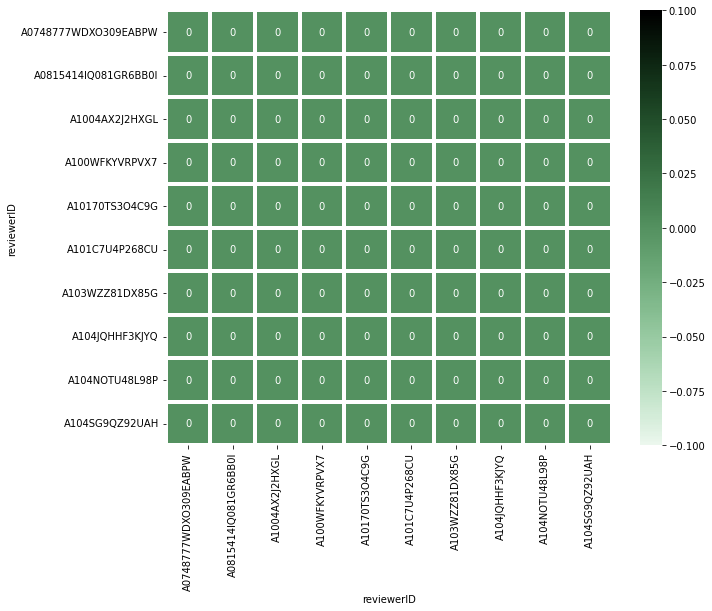

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(cosine_table.iloc[:,:10].head(10), 
            annot=True, 
            linewidths=3, 
            cmap=sns.cubehelix_palette(start=2, 
                                       rot=0, 
                                       dark=.95, #0,
                                       light=0, #.95#
                                       reverse=True,
                                       as_cmap=True));

In [37]:
new_user = {'Play-Doh Picnic Bucket Playset': 5, 
         'Melissa &amp; Doug Fairy Tale Friendship Jumbo Jigsaw Floor Puzzle (24 pcs, 2 x 3 feet)': 4, 
         'Fisher-Price Imaginext DC Super Friends Mini Figure The Joker': 3, 
         'Chenille Kraft WonderFoam Letters and Numbers':5, 
         'Do A Dot Art Tales of the Mermaid Creative Coloring Book':1}

In [39]:
products = ncf_df.columns

,rating,product
0,5.0,"12&#39;&#39; Petal Pink Latex Balloons, 72ct"
5708,5.0,"OLIA DESIGN Gym Badges League Pin Gen Set, 8 P..."
5722,5.0,Official Nerf N-Strike Elite Series Vision Gear
5721,5.0,Official Nerf N-Strike Elite Series Mega Missi...
5720,5.0,Official Nerf N-Strike Elite Series Firefly Mi...
5719,5.0,Odoria 1:12 Miniature 5PCS Mineral Water Bottl...
5718,5.0,Odoria 1:12 Miniature 15PCS Blue Porcelain Chi...
5717,5.0,Octopus Wall Tumbler Toy (colors may vary)
5716,5.0,Oball Go Grippers Loader
5715,5.0,Oball Go Grippers Bounce 'N Zoom Speedway


In [ ]:
pickle.dump(ncf_df, open('ncf_dataframe.sav', "wb"))